In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


In [2]:
theme = sns.set_style("whitegrid")

train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [5]:
display(train_df.head())
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [7]:
display(train_df.describe(include="all"))
print("Missing values in train:")
print(train_df.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Missing values in train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


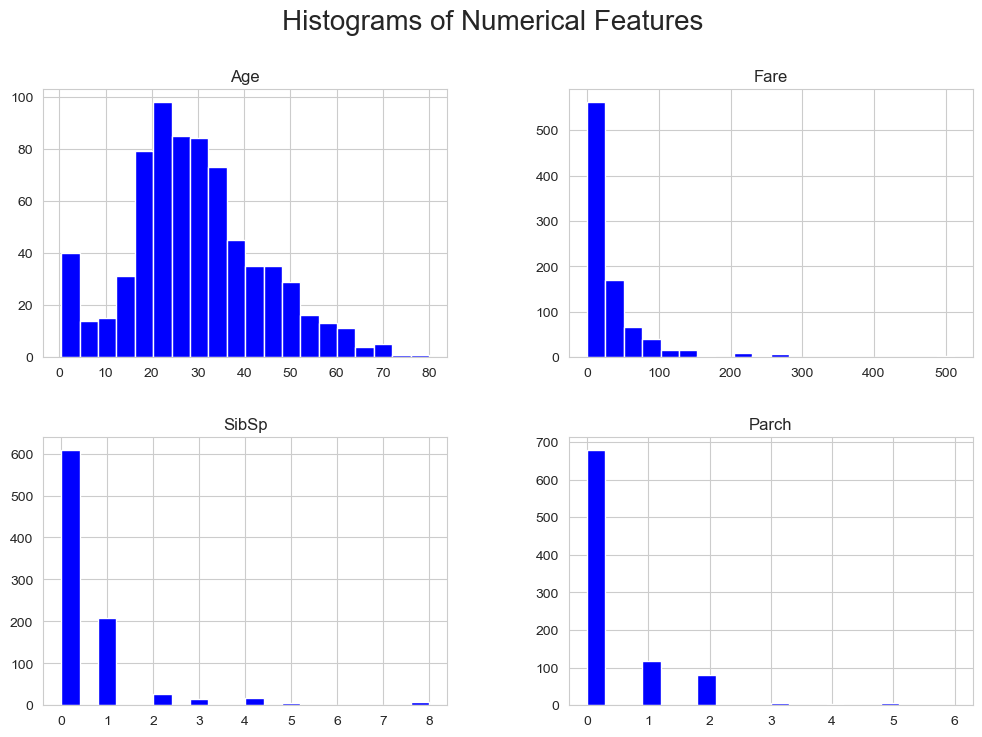

In [9]:
num_cols = ["Age", "Fare", "SibSp", "Parch"]
train_df[num_cols].hist(bins=20, figsize=(12, 8), color='blue')
plt.suptitle("Histograms of Numerical Features", fontsize=20)
plt.show()

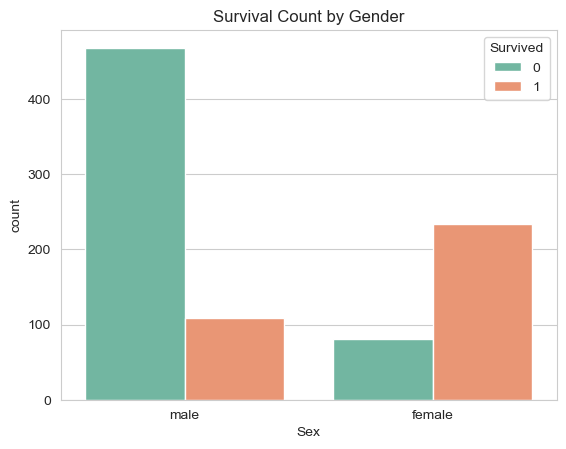

In [10]:
sns.countplot(data=train_df, x="Sex", hue="Survived", palette="Set2")
plt.title("Survival Count by Gender")
plt.show()

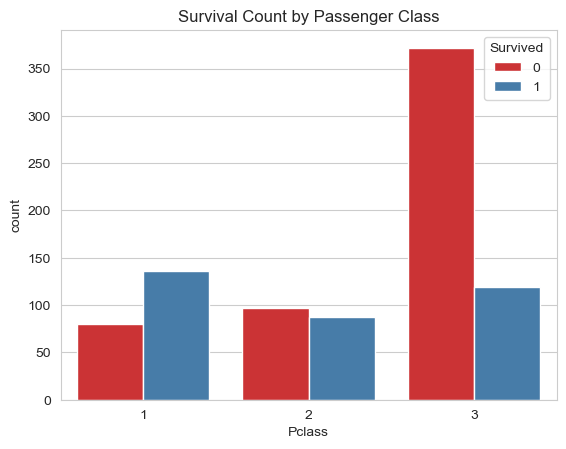

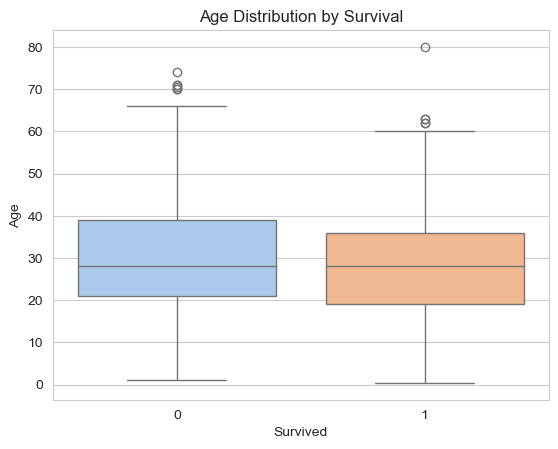

In [11]:
sns.countplot(data=train_df, x="Pclass", hue="Survived", palette="Set1")
plt.title("Survival Count by Passenger Class")
plt.show()

sns.boxplot(data=train_df, x="Survived", y="Age", palette="pastel")
plt.title("Age Distribution by Survival")
plt.show()

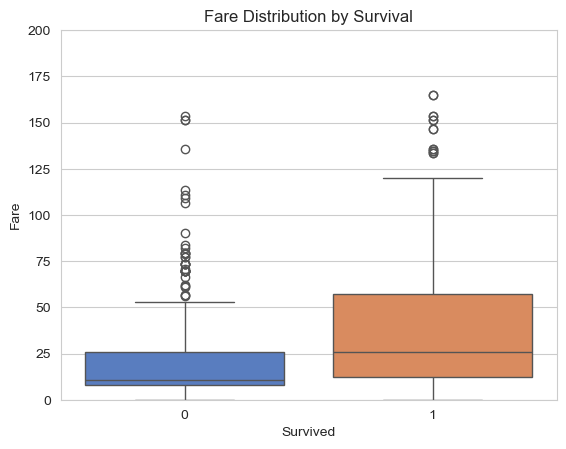

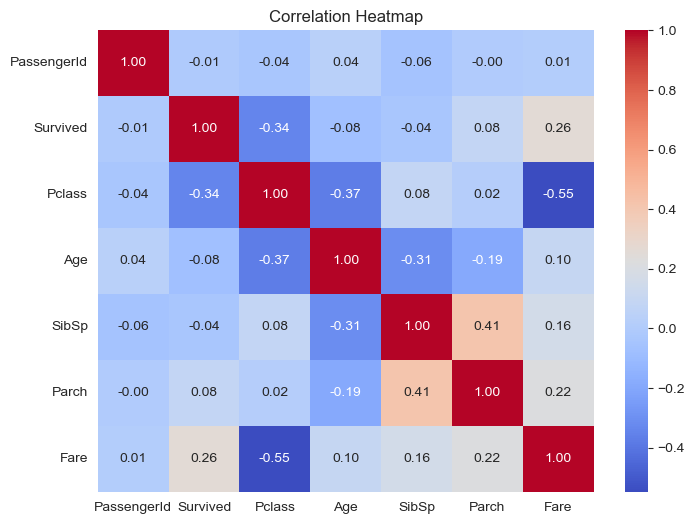

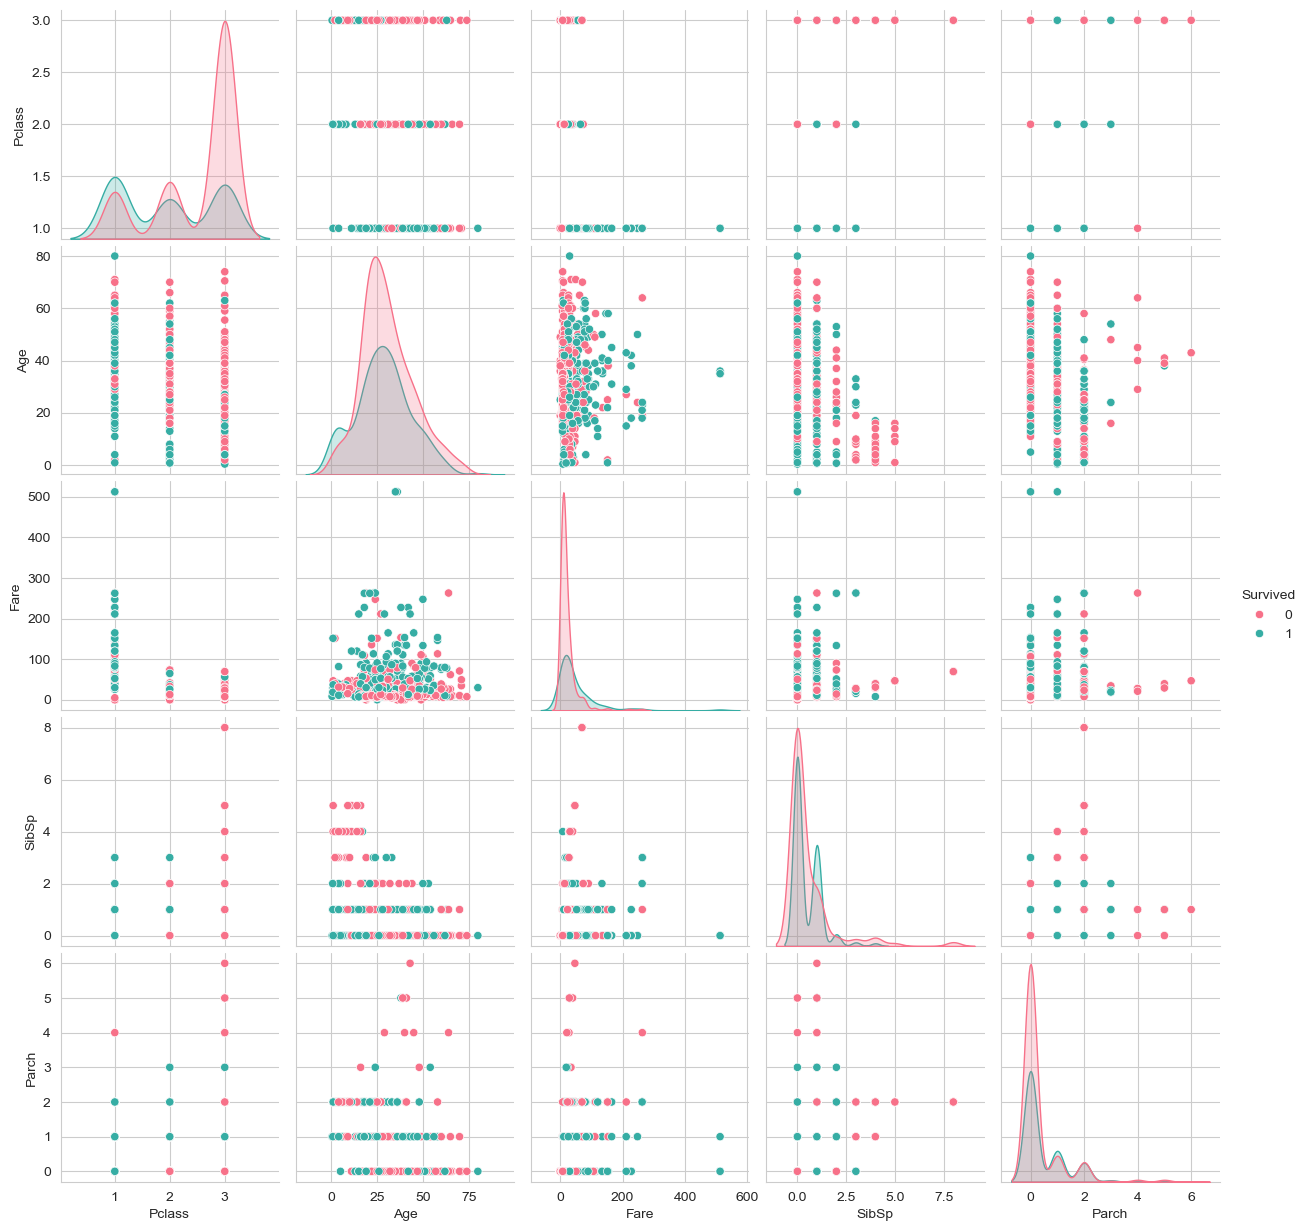

In [12]:
sns.boxplot(data=train_df, x="Survived", y="Fare", palette="muted")
plt.title("Fare Distribution by Survival")
plt.ylim(0, 200) 
plt.show()


# --- 9. Correlation Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



sns.pairplot(train_df[["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]], hue="Survived", palette="husl")
plt.show()

In [13]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

In [14]:
train_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [15]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)

In [16]:
train_df.drop(columns=["Cabin"], inplace=True)
test_df.drop(columns=["Cabin"], inplace=True)

In [17]:
label_enc = LabelEncoder()

train_df["Sex"] = label_enc.fit_transform(train_df["Sex"])
test_df["Sex"] = label_enc.transform(test_df["Sex"])

In [18]:
train_df["Embarked"] = label_enc.fit_transform(train_df["Embarked"])
test_df["Embarked"] = label_enc.transform(test_df["Embarked"])

In [19]:
train_df.drop(columns=["Name", "Ticket"], inplace=True)
test_df.drop(columns=["Name", "Ticket"], inplace=True)

In [20]:
print("Remaining missing values in train:")
print(train_df.isnull().sum())
print("\nRemaining missing values in test:")
print(test_df.isnull().sum())


display(train_df.head())
display(test_df.head())

Remaining missing values in train:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Remaining missing values in test:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [21]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())


In [22]:
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])
test_df["Embarked"] = test_df["Embarked"].fillna(test_df["Embarked"].mode()[0])


In [23]:
cols_to_drop = ["Name", "Ticket"]
train_df.drop(columns=[c for c in cols_to_drop if c in train_df.columns], inplace=True)
test_df.drop(columns=[c for c in cols_to_drop if c in test_df.columns], inplace=True)


In [24]:
train_df.drop(columns=["Name", "Ticket"], inplace=True, errors="ignore")
test_df.drop(columns=["Name", "Ticket"], inplace=True, errors="ignore")


In [25]:
print("Remaining missing values in train:")
print(train_df.isnull().sum())
print("\nRemaining missing values in test:")
print(test_df.isnull().sum())


display(train_df.head())
display(test_df.head())

Remaining missing values in train:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Remaining missing values in test:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [26]:
X = train_df.drop(columns=["Survived", "PassengerId"])
y = train_df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
y_pred = log_reg.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8044692737430168

Confusion Matrix:
 [[98 12]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [29]:
X = train_df.drop(columns=["Survived", "PassengerId"])
y = train_df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


# Predictions
y_pred = log_reg.predict(X_val)
y_pred_proba = log_reg.predict_proba(X_val)[:, 1]

In [31]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba))

Accuracy: 0.8044692737430168

Confusion Matrix:
 [[98 12]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC-AUC Score: 0.8523056653491438


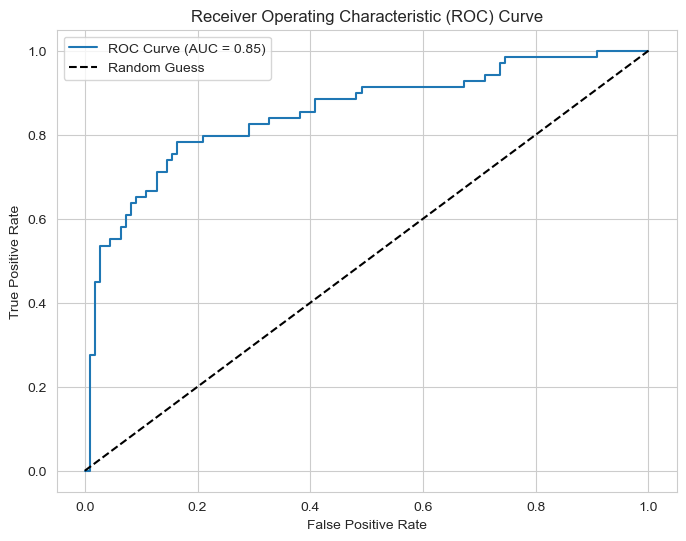

In [32]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


Logistic Regression Coefficients:


,Feature,Coefficient
5,Fare,0.002199
2,Age,-0.038022
4,Parch,-0.086772
6,Embarked,-0.230824
3,SibSp,-0.246999
0,Pclass,-1.046840
1,Sex,-2.590506


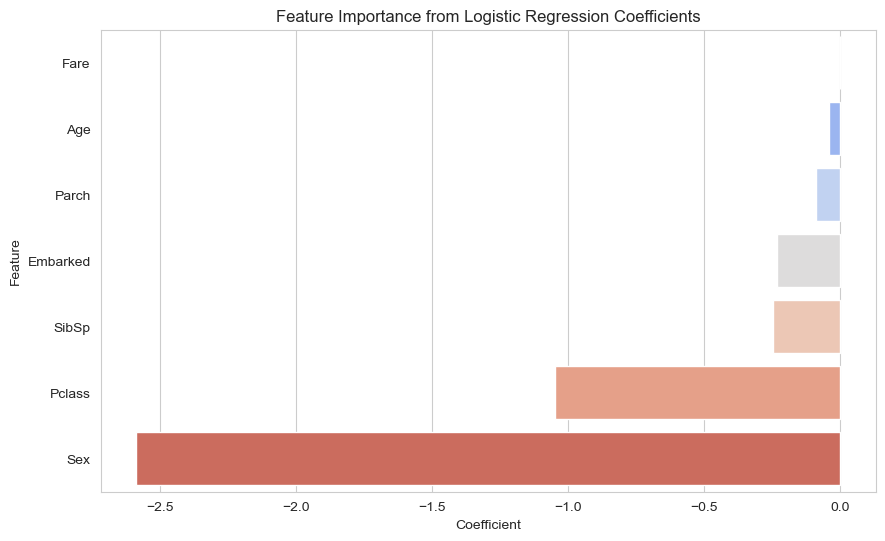

In [33]:
coefficients = pd.DataFrame({
"Feature": X.columns,
"Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)


print("\nLogistic Regression Coefficients:")
display(coefficients)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients, palette="coolwarm")
plt.title("Feature Importance from Logistic Regression Coefficients")
plt.show()

In [36]:
import joblib
joblib.dump(log_reg, "titanic.pkl")


['titanic.pkl']

In [37]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

In [38]:
model = joblib.load("titanic.pkl")

st.title("Titanic Survival Prediction App")
st.write("Enter passenger details to predict survival probability.")

2025-10-04 18:08:55.900 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:08:56.439 
  command:

    streamlit run C:\Users\chandu\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-04 18:08:56.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:08:56.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:08:56.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [39]:
pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.slider("Age", 0, 80, 25)
sibsp = st.number_input("Number of Siblings/Spouses Aboard", 0, 10, 0)
parch = st.number_input("Number of Parents/Children Aboard", 0, 10, 0)
fare = st.slider("Fare", 0.0, 500.0, 30.0)
embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

2025-10-04 18:09:03.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:03.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:03.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:03.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:03.457 Session state does not function when running a script without `streamlit run`
2025-10-04 18:09:03.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:03.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:03.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09

In [40]:
sex_encoded = 1 if sex == "male" else 0
embarked_map = {"C": 0, "Q": 1, "S": 2}
embarked_encoded = embarked_map[embarked]

input_data = pd.DataFrame({
    "Pclass": [pclass],
    "Sex": [sex_encoded],
    "Age": [age],
    "SibSp": [sibsp],
    "Parch": [parch],
    "Fare": [fare],
    "Embarked": [embarked_encoded]
})

In [41]:
if st.button("Predict Survival"):
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    st.subheader("Prediction Result:")
    st.write(f"**Survived:** {'Yes' if prediction == 1 else 'No'}")
    st.write(f"**Survival Probability:** {probability:.2%}")

2025-10-04 18:09:09.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:09.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:09.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:09.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 18:09:09.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Precision and Recall are two key evaluation metrics used in classification tasks, especially when dealing with imbalanced datasets. Precision measures how many of the predicted positive instances are actually positive. In other words, it shows the model’s accuracy in identifying only the relevant instances. Mathematically, Precision = True Positives / (True Positives + False Positives). On the other hand, Recall (also known as Sensitivity or True Positive Rate) measures how many of the actual positive instances were correctly identified by the model. It is calculated as Recall = True Positives / (True Positives + False Negatives). In simple terms, Precision focuses on quality, while Recall focuses on completeness. A high Precision means fewer false positives, whereas a high Recall means fewer false negatives.

Cross-validation is a model validation technique used to assess how well a machine learning model generalizes to an independent dataset. The most common form is k-fold cross-validation, where the dataset is divided into k equal subsets (folds). The model is trained on (k–1) folds and tested on the remaining one, and this process is repeated k times so that each fold serves as the test set once. The average performance across all folds is then calculated to get a reliable estimate of the model’s effectiveness. Cross-validation is especially important in binary classification because it helps prevent overfitting and ensures the model performs well on unseen data. It provides a more accurate measure of model performance than a single train-test split, particularly when the dataset is small or imbalanced.